<a href="https://colab.research.google.com/github/vinay15shakya/Codsoft_Intern/blob/main/medical_insurance_8th_sem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U Kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [ ]:
medical_df= pd.read_csv('insurance.csv')

In [ ]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
medical_df.shape

(1338, 7)

In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


data visualiztation


<Figure size 300x300 with 0 Axes>

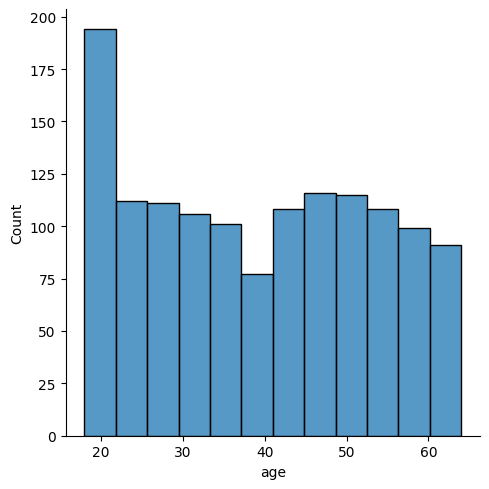

In [ ]:
plt.figure(figsize=(3,3))
sns.displot(data=medical_df,x='age')

<Figure size 300x300 with 0 Axes>

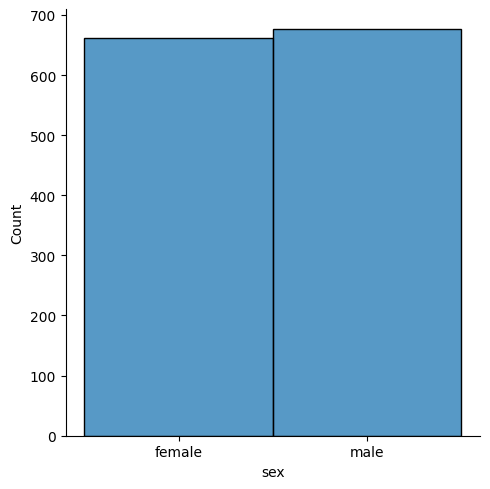

In [ ]:
plt.figure(figsize=(3,3))
sns.displot(data=medical_df,x='sex')

In [ ]:
medical_df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<Figure size 400x400 with 0 Axes>

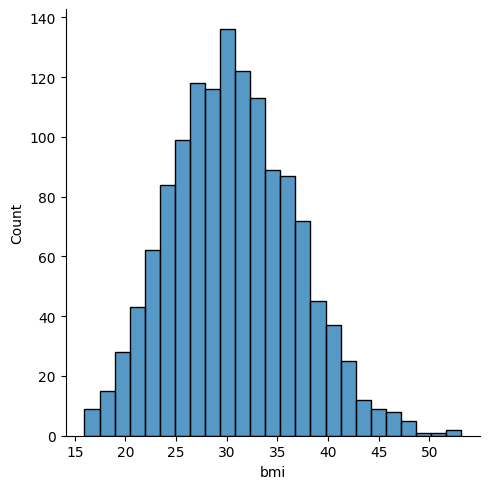

In [ ]:
plt.figure(figsize=(4,4))
sns.displot(data=medical_df,x='bmi')

In [ ]:
medical_df['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

<Figure size 400x400 with 0 Axes>

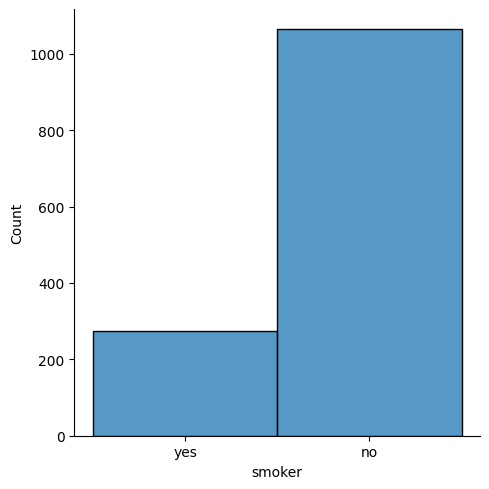

In [ ]:
plt.figure(figsize=(4,4))
sns.displot(data=medical_df,x='smoker')

In [ ]:
medical_df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

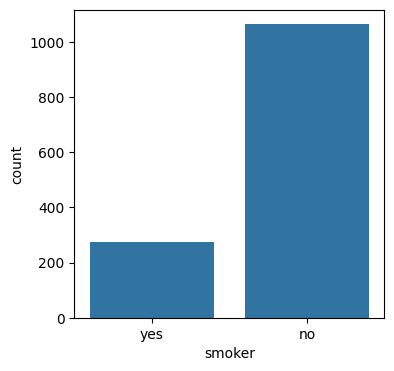

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(data=medical_df,x='smoker')
plt.show()

convet categorical column to numerical


In [ ]:
medical_df.replace({'sex':{'male':0,'female':1}},inplace=True)
medical_df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
medical_df.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)


In [ ]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


train test split

In [ ]:
x=medical_df.drop('charges',axis=1)
y=medical_df['charges']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [ ]:
x_train.shape

(1204, 6)

In [ ]:
x_test.shape

(134, 6)

In [ ]:
lg=LinearRegression()
lg.fit(x_train,y_train) # 80 model will be train

y_pred=lg.predict(x_test) #10 model will be predicted

In [ ]:
y_pred

array([ 1831.00128056, 12159.15610236, 10221.02957304,  1931.07889605,
        7708.32210916, 11362.71453869,  3226.18930032,  1380.14055226,
       12078.1278645 ,  9545.09206883, 11588.58647378,  5076.08579737,
       29657.97519822,  -722.90554201, 13063.66673311, 12602.30411806,
        4123.86093137,  7880.72658343, 28931.66363323,  3162.51691839,
       12519.748324  ,  2325.26699456, 34097.77374993, 32372.92091451,
       30147.66200688,  8594.13929241,  2529.58894932, 14902.45791073,
        6774.11912654,  2106.22614057,  9676.06641324,  5885.77299598,
        4266.22715745,  4644.67563944,  8608.61245099,  4914.24229626,
       30388.93753313,  6648.21466294, 27758.66407963, 13489.6156729 ,
         351.44237387, 28512.30416636,  7877.24048384,  1639.50750102,
       10302.9694382 ,  8050.16026729, 10992.48504884,  8023.50359127,
       10611.84955849, 13729.01898728,  5679.73245484,  -998.98532889,
       26638.5613963 , 37076.22859917,  7350.96806601, 18098.78497121,
      

In [ ]:
r2_score(y_test,y_pred) #y_test ke machin have no idea

0.7058997983752826

**Prediction system**

In [ ]:
input_df=(32,0,28.880,0,1,2)
np_df=np.asarray(input_df)
input_df_reshaped=np_df.reshape(1,-1)
prediction=lg.predict(input_df_reshaped)

print("medical Insuranc is",prediction)

medical Insuranc is [5459.71569296]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
